In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


/home/shared/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode


/home/shared/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shared/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/shared/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|█████████████████████████████████████████████████████████████████████████| 160M/160M [00:01<00:00, 89.2MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
def load_image(image_path):
    # Load image and convert to RGB
    image = Image.open(image_path).convert("RGB")
    return image

def preprocess_image(image):
    # Convert image to tensor
    image_tensor = F.to_tensor(image)
    return image_tensor

image_path = '/NAS/prod_platform_data/twins/37989/sourceImages_medium/Section 9__2BackCamera__B_01_02108_d0f507.JPG'  # Replace with your own aerial image path
image = load_image(image_path)
image_tensor = preprocess_image(image)


In [5]:
# Add batch dimension [N, C, H, W] since the model expects a batch
with torch.no_grad():
    predictions = model([image_tensor])



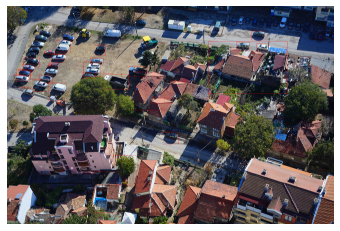

In [6]:
def visualize_predictions(image, predictions, threshold=0.5):
    # Convert image tensor to NumPy for plotting
    image_np = np.array(image)
    
    # Get predictions: bounding boxes, labels, and scores
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    
    # Draw the boxes for objects with scores above the threshold
    for box, score, label in zip(boxes, scores, labels):
        if score >= threshold:
            # Unpack box coordinates
            x_min, y_min, x_max, y_max = box
            # Draw rectangle on image
            cv2.rectangle(image_np, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
            # Add label and score
            cv2.putText(image_np, f"Label: {label}, Score: {score:.2f}", (int(x_min), int(y_min) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    
    # Show the final image
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()

# Visualize detected objects
visualize_predictions(image, predictions)
